In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth

df = pd.read_csv('./data/filtered_1kposts.csv')
df.head()

,id,reputation,views,up_votes,down_votes,count_tags,php,html,mysql,css,...,front-end,react,asp.net-core,spring-boot,angular,typescript,pandas,vue.js,react-native,flutter
0,12,2517,1124,1223,8,25,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,28,3222,284,128,4,48,3,3,1,0,...,0,0,0,0,0,0,2,0,0,0
2,29,116,67,2,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,11,62,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31,101,31,15,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(0.0, 20.0)

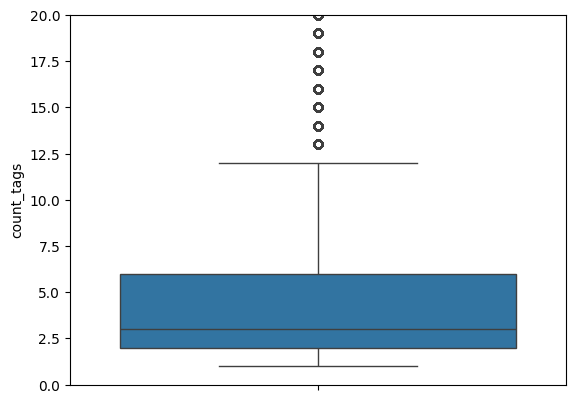

In [64]:
sns.boxplot(df['count_tags'])
plt.ylim(0, 20)

In [65]:
# Convert our df
fp_df = df.drop(columns=['id', 'reputation', 'views', 'up_votes', 'down_votes', 'count_tags']) > 0
fp_df.head()

,php,html,mysql,css,html5,css3,jquery,javascript,orientação-a-objetos,angularjs,...,oracle,git,postgresql,django,data,c++,algoritmo,react,angular,typescript
0,False,False,False,True,False,False,True,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
res = fpgrowth(fp_df, min_support=.05, use_colnames=True)
res

,support,itemsets
0,0.277356,(javascript)
1,0.128669,(python)
2,0.116531,(jquery)
3,0.112158,(css)
4,0.104066,(sql)
5,0.067947,(c)
6,0.064539,(array)
7,0.224643,(php)
8,0.180186,(html)
9,0.157417,(java)


In [70]:
import pysubgroup as ps

sd_df = df.drop(columns=['id', 'views', 'up_votes', 'down_votes', 'count_tags'])
sd_df.head()

,reputation,php,html,mysql,css,html5,css3,jquery,javascript,orientação-a-objetos,...,oracle,git,postgresql,django,data,c++,algoritmo,react,angular,typescript
0,2517,0,0,0,1,0,0,3,4,0,...,0,2,0,0,0,0,0,0,0,0
1,3222,3,3,1,0,0,0,2,4,0,...,0,1,1,0,0,0,0,0,0,0
2,116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
target = ps.BinaryTarget ('reputation', True)
searchspace = ps.create_selectors(sd_df, ignore=['reputation'])
task = ps.SubgroupDiscoveryTask (
    sd_df,
    target,
    searchspace,
    result_set_size=5,
    depth=2,
    qf=ps.WRAccQF())
result = ps.DFS().execute(task)

/run/media/artixs/nvmekin/code/stackoverflow-datamine/venv/lib/python3.13/site-packages/pysubgroup/binary_target.py:356: RuntimeWarning: invalid value encountered in divide
  p_subgroup = np.divide(positives_subgroup, instances_subgroup)


In [69]:
result.to_dataframe()

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.028965,java: [0:1[ AND javascript: [0:1[,37078,61048,11421,15893,23970,0.607358,0.392642,0.718618,0.281382,0.308026,0.186567,0.260336,1.183187
1,0.028803,c#: [0:1[ AND javascript: [0:1[,39221,61048,11969,15893,21827,0.642462,0.357538,0.753099,0.246901,0.305168,0.179777,0.260336,1.172208
2,0.026981,javascript: [0:1[ AND sql: [0:1[,40328,61048,12146,15893,20720,0.660595,0.339405,0.764236,0.235764,0.301180,0.180840,0.260336,1.156890
3,0.026729,java: [0:1[ AND jquery: [0:1[,45788,61048,13552,15893,15260,0.750033,0.249967,0.852702,0.147298,0.295973,0.153408,0.260336,1.136887
4,0.026722,android: [0:1[ AND javascript: [0:1[,40600,61048,12201,15893,20448,0.665050,0.334950,0.767696,0.232304,0.300517,0.180556,0.260336,1.154343
